## EEG signal Based Eye State Classification

### Convert ARFF to CSV

In [1]:
import pandas as pd
from scipy.io import arff
data = arff.loadarff('EEG Eye State.arff')
train= pd.DataFrame(data[0])
train.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [2]:
catCols = [col for col in train.columns if train[col].dtype=="O"]
catCols[:5]

['eyeDetection']

In [3]:
train[catCols]=train[catCols].apply(lambda x: x.str.decode('utf8'))
train.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
df = train
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


### Creating X and Y

In [5]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1:]

In [6]:
x

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [7]:
y

,eyeDetection
0,0
1,0
2,0
3,0
4,0
...,...
14975,1
14976,1
14977,1
14978,1


In [8]:
model_scores = []

# Statistical Features Extraction using PCA

## Data Preparation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [10]:
X_train.shape

(11984, 14)

In [11]:
X_test.shape

(2996, 14)

## Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

## PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [14]:
X_train_pca = pca.fit_transform(X_train_trf)
X_test_pca = pca.transform(X_test_trf)

In [15]:
pca.explained_variance_ratio_

array([3.11188572e-01, 2.75351877e-01, 2.22343922e-01, 1.10886839e-01,
       4.79263203e-02, 1.78342192e-02, 6.22034047e-03, 4.58090354e-03,
       2.51189412e-03, 1.14732230e-03, 5.28239139e-06, 1.83989894e-06,
       3.74172898e-07, 2.94074849e-07])

In [16]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.31118857, 0.58654045, 0.80888437, 0.91977121, 0.96769753,
       0.98553175, 0.99175209, 0.99633299, 0.99884489, 0.99999221,
       0.99999749, 0.99999933, 0.99999971, 1.        ])

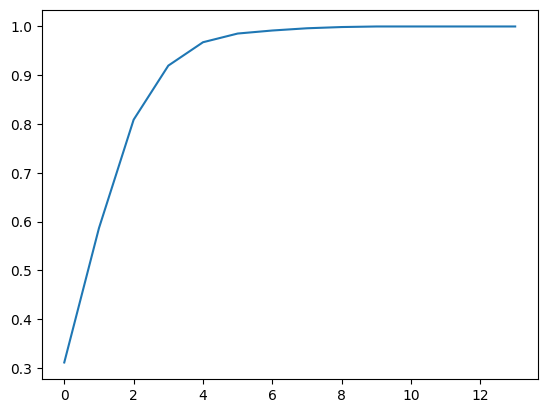

In [17]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [18]:
pca = PCA(n_components=9)

In [19]:
X_train_new = pca.fit_transform(X_train_trf)
X_test_new = pca.transform(X_test_trf)

In [20]:
X_train_new.shape

(11984, 9)

In [21]:
y_train.shape

(11984, 1)

In [22]:
X_test_new.shape

(2996, 9)

In [23]:
y_test.shape

(2996, 1)

In [24]:
y_train_new = np.array([int(x) for x in y_train.values.ravel()])
y_train_new

array([1, 0, 0, ..., 1, 1, 1])

In [25]:
y_test_new = np.array([int(x) for x in y_test.values.ravel()])
y_test_new

array([1, 0, 0, ..., 0, 1, 0])

In [26]:
len(model_scores)

0

## Training on SVM

In [85]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train_new, y_train_new)

SVC(random_state=0)

In [86]:
predicted = clf.predict(X_test_new)

In [87]:
predicted

array([1, 0, 0, ..., 0, 0, 0])

### Performance

In [88]:
from sklearn import metrics
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predicted), metrics.precision_score(y_test_new, predicted),metrics.recall_score(y_test_new, predicted),metrics.f1_score(y_test_new, predicted)))

model_scores.append([metrics.accuracy_score(y_test_new, predicted), metrics.precision_score(y_test_new, predicted),metrics.recall_score(y_test_new, predicted),metrics.f1_score(y_test_new, predicted)])


Accuracy = 0.6151535380507344
Precision = 0.7131011608623549
Recall = 0.3049645390070922
F1 Score = 0.42722305017386986


## Training on Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf_logis = LogisticRegression()
clf_logis.fit(X_train_new, y_train_new)

LogisticRegression()

In [33]:
predict = clf_logis.predict(X_test_new)

### Performance

In [34]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict), metrics.precision_score(y_test_new, predict),metrics.recall_score(y_test_new, predict),metrics.f1_score(y_test_new, predict)))
model_scores.append([metrics.accuracy_score(y_test_new, predict), metrics.precision_score(y_test_new, predict),metrics.recall_score(y_test_new, predict),metrics.f1_score(y_test_new, predict)])

Accuracy = 0.5607476635514018
Precision = 0.5549065420560748
Recall = 0.33687943262411346
F1 Score = 0.41924095322153576


In [35]:
len(model_scores)

2

## Second Approach Directly use 14 values of EEG data and use it for prediction

## Training on Neural Networks

### Creating Model

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [37]:
x.shape

(14980, 14)

In [38]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (X_train_new.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training

In [40]:
X_train_new

array([[-0.9839272 , -0.15408588,  0.10933962, ..., -0.23558059,
        -0.15185134,  0.00552594],
       [ 0.02701063,  0.25355098,  0.09169315, ...,  0.07937715,
        -0.15818455, -0.11991045],
       [-0.09257934, -0.12565428,  0.04498988, ...,  0.01800095,
        -0.06470526,  0.06358824],
       ...,
       [ 0.0189917 ,  0.0635686 , -0.21385088, ..., -0.23506001,
         0.41703537,  0.09387348],
       [-0.18188258, -0.28500596, -0.08897007, ..., -0.08171022,
         0.09719866,  0.02051246],
       [-0.3074709 , -0.14590545, -0.11793179, ...,  0.13099581,
        -0.30538912, -0.17958112]])

In [41]:
y_train.values.ravel()

array(['1', '0', '0', ..., '1', '1', '1'], dtype=object)

In [42]:
# y_train_new = np.array([int(x) for x in y_train.values.ravel()])
# y_train_new

In [43]:
hist = model.fit(X_train_new, y_train_new, epochs = 100, validation_split = 0.1, verbose = 2)

Epoch 1/100
338/338 - 2s - loss: 0.6543 - accuracy: 0.6048 - val_loss: 0.6335 - val_accuracy: 0.6205 - 2s/epoch - 7ms/step
Epoch 2/100
338/338 - 1s - loss: 0.6206 - accuracy: 0.6345 - val_loss: 0.6190 - val_accuracy: 0.6272 - 977ms/epoch - 3ms/step
Epoch 3/100
338/338 - 1s - loss: 0.6083 - accuracy: 0.6510 - val_loss: 0.6104 - val_accuracy: 0.6355 - 821ms/epoch - 2ms/step
Epoch 4/100
338/338 - 1s - loss: 0.5986 - accuracy: 0.6654 - val_loss: 0.6007 - val_accuracy: 0.6589 - 596ms/epoch - 2ms/step
Epoch 5/100
338/338 - 1s - loss: 0.5872 - accuracy: 0.6713 - val_loss: 0.5943 - val_accuracy: 0.6597 - 621ms/epoch - 2ms/step
Epoch 6/100
338/338 - 1s - loss: 0.5767 - accuracy: 0.6822 - val_loss: 0.5842 - val_accuracy: 0.6731 - 704ms/epoch - 2ms/step
Epoch 7/100
338/338 - 1s - loss: 0.5686 - accuracy: 0.6910 - val_loss: 0.5774 - val_accuracy: 0.6897 - 623ms/epoch - 2ms/step
Epoch 8/100
338/338 - 1s - loss: 0.5612 - accuracy: 0.6983 - val_loss: 0.5786 - val_accuracy: 0.6847 - 628ms/epoch - 2ms/

In [44]:
# y_test_new = np.array([int(x) for x in y_test.values.ravel()])
# y_test_new

In [45]:
score = model.evaluate(X_test_new, y_test_new, verbose=2)
print("Accuracy: ", score[1])

94/94 - 0s - loss: 0.4015 - accuracy: 0.8007 - 136ms/epoch - 1ms/step
Accuracy:  0.8007343411445618


In [46]:
predict2 = [1 if a>0.5 else 0 for a in model.predict(X_test_new)]

94/94 [==============================] - 0s 1ms/step


### Performance

In [47]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict2), metrics.precision_score(y_test_new, predict2),metrics.recall_score(y_test_new, predict2),metrics.f1_score(y_test_new, predict2)))
model_scores.append([metrics.accuracy_score(y_test_new, predict2), metrics.precision_score(y_test_new, predict2),metrics.recall_score(y_test_new, predict2),metrics.f1_score(y_test_new, predict2)])

Accuracy = 0.8007343124165555
Precision = 0.8134155744024673
Recall = 0.74822695035461
F1 Score = 0.7794606575544883


In [48]:
len(model_scores)

3

# Improved Neural Network (Tuning Parameters)

In [49]:
model2 = Sequential()
model2.add(Dense(1000, activation = 'relu', input_shape = (X_train_new.shape[1], )))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [50]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [51]:
hist1 = model2.fit(X_train_new, y_train_new, epochs = 100, validation_split = 0.1, verbose = 2)

Epoch 1/100
338/338 - 13s - loss: 0.6681 - accuracy: 0.6366 - val_loss: 0.5631 - val_accuracy: 0.6939 - 13s/epoch - 38ms/step
Epoch 2/100
338/338 - 11s - loss: 0.5262 - accuracy: 0.7320 - val_loss: 0.4870 - val_accuracy: 0.7523 - 11s/epoch - 34ms/step
Epoch 3/100
338/338 - 12s - loss: 0.4990 - accuracy: 0.7663 - val_loss: 0.4624 - val_accuracy: 0.7815 - 12s/epoch - 35ms/step
Epoch 4/100
338/338 - 12s - loss: 0.4462 - accuracy: 0.7812 - val_loss: 0.4338 - val_accuracy: 0.7915 - 12s/epoch - 35ms/step
Epoch 5/100
338/338 - 11s - loss: 0.4277 - accuracy: 0.7933 - val_loss: 0.4158 - val_accuracy: 0.7973 - 11s/epoch - 32ms/step
Epoch 6/100
338/338 - 11s - loss: 0.4055 - accuracy: 0.8029 - val_loss: 0.4087 - val_accuracy: 0.8090 - 11s/epoch - 33ms/step
Epoch 7/100
338/338 - 12s - loss: 0.4168 - accuracy: 0.8097 - val_loss: 0.4136 - val_accuracy: 0.7915 - 12s/epoch - 35ms/step
Epoch 8/100
338/338 - 12s - loss: 0.3830 - accuracy: 0.8185 - val_loss: 0.4176 - val_accuracy: 0.8107 - 12s/epoch - 34

In [52]:
score = model2.evaluate(X_test_new, y_test_new, verbose=2)
print("Accuracy: ", score[1])

94/94 - 1s - loss: 0.5329 - accuracy: 0.8501 - 603ms/epoch - 6ms/step
Accuracy:  0.8501335382461548


In [53]:
predict3 = [1 if a>=0.5 else 0 for a in model2.predict(X_test_new)]

94/94 [==============================] - 1s 6ms/step


In [54]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict3), metrics.precision_score(y_test_new, predict3),metrics.recall_score(y_test_new, predict3),metrics.f1_score(y_test_new, predict3)))
model_scores.append([metrics.accuracy_score(y_test_new, predict3), metrics.precision_score(y_test_new, predict3),metrics.recall_score(y_test_new, predict3),metrics.f1_score(y_test_new, predict3)])

Accuracy = 0.8501335113484646
Precision = 0.8637395912187736
Recall = 0.8092198581560284
F1 Score = 0.8355913584767485


In [55]:
len(model_scores)

4

# Conclusion

## Ploting the results

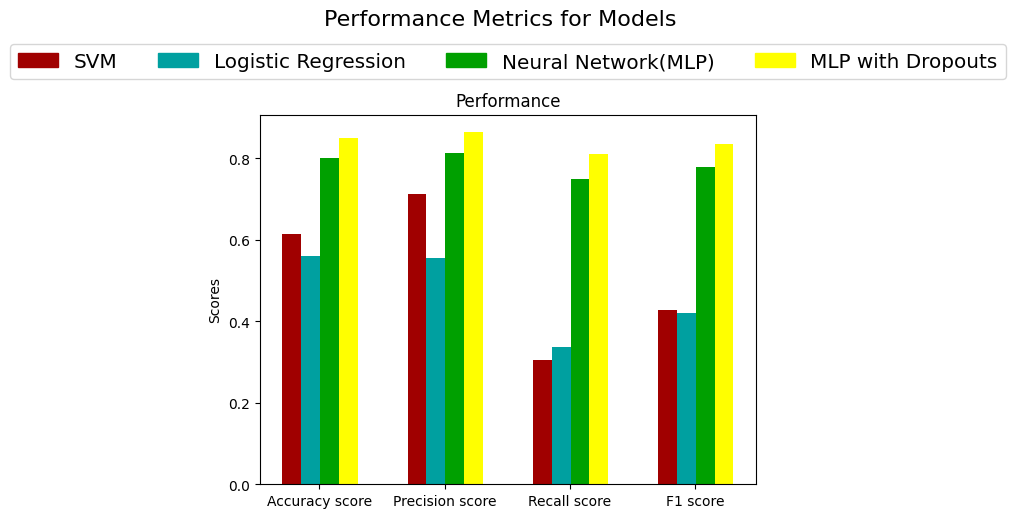

In [56]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

objects = ['Accuracy score', 'Precision score', 'Recall score', 'F1 score']
w =  0.15
y_pos = np.arange(len(objects))

color = ['#A00000','#00A0A0','#00A000', '#FFFF00']
s = 0
for i in range(len(model_scores)):
    plt.bar(y_pos+s, model_scores[i], color = color[i], width = w )
    s += w

plt.xticks(y_pos + 0.22, objects)
plt.ylabel('Scores')
plt.title('Performance')
plt.suptitle("Performance Metrics for Models", fontsize = 16, y = 1.10)

p = ['SVM',  'Logistic Regression', 'Neural Network(MLP)', 'MLP with Dropouts']

patches = []

for k in range(len(p)):
    patches.append(mpatches.Patch(color = color[k], label = p[k]))

plt.legend(handles = patches, bbox_to_anchor = (0.5, 1.19),loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')

plt.show();